# Frequent items Generation and rules Generation

In [10]:
def createC1(dataSet): # 1st candidate set
    C1 = []
    for transaction in dataSet:
        for item in transaction:
            if not [item] in C1:
                C1.append([item])
                
    C1.sort()
    return list(map(frozenset, C1))#use frozen set so we
                            #can use it as a key in a dict   
def support_data(D, Ck, minSup):
    ssCnt = {}
    for tid in D: # from the whole transactions 
        for can in Ck: # from the previous frequent item sets
            if can.issubset(tid): # pruning and getting only frequent
                if not can in ssCnt: ssCnt[can]=1
                else: ssCnt[can] += 1
    retList = []
    supportData = {}
    for key in ssCnt: # calculating support count from the candidate item sets 
        support = ssCnt[key]/float(len(D)) # support count calculation
        if support >= minSup: # checking
            retList.insert(0,key)
        supportData[key] = support # frequent item sets 
    return retList, supportData

def Candidate_Gen(Lk, k): #creates Ck
    retList = []
    lenLk = len(Lk)
    for i in range(lenLk):
        for j in range(i+1, lenLk): 
            L1 = list(Lk[i])[:k-2]; L2 = list(Lk[j])[:k-2]
            L1.sort(); L2.sort()
            if L1==L2: #if first k-2 elements are equal
                retList.append(Lk[i] | Lk[j]) #set union
    return retList

def generateRules(L, supportData, minConf=0.7):  #supportData is a dict coming from scanD
    bigRuleList = []
    for i in range(1, len(L)):#only get the sets with two or more items
        for freqSet in L[i]:
            H = [frozenset([item]) for item in freqSet]
            if (i > 1):
                rulesFromConseq(freqSet, H, supportData, bigRuleList, minConf)
            else:
                calcConf(freqSet, H, supportData, bigRuleList, minConf)
    return bigRuleList  


def rulesFromConseq(freqSet, H, supportData, brl, minConf=0.7):
    m = len(H[0])
    if (len(freqSet) > (m + 1)): #try further merging
        Hmp1 = Candidate_Gen(H, m+1)#create Hm+1 new candidates
        Hmp1 = calcConf(freqSet, Hmp1, supportData, brl, minConf)
        if (len(Hmp1) > 1):    #need at least two sets to merge
            rulesFromConseq(freqSet, Hmp1, supportData, brl, minConf)
            
def calcConf(freqSet, H, supportData, brl, minConf=0.7):
    prunedH = [] #create new list to return
    for conseq in H:
        conf = supportData[freqSet]/supportData[freqSet-conseq] #calc confidence
        if conf >= minConf: 
            brl.append((freqSet-conseq, conseq, conf, supportData[freqSet], supportData[conseq]))
            prunedH.append(conseq)
            
            if(len(freqSet-conseq) != len(conseq)):
                conf = supportData[freqSet-conseq]/supportData[conseq] #calc confidence
                brl.append((conseq, freqSet-conseq, conf, supportData[freqSet], supportData[freqSet-conseq]))

    return prunedH

def myapriori(dataSet, minSup = 0.1):
    k = 1
    candidateSetsCount = 0
    C1 = createC1(dataSet) # getting level 1 candidates, all unique items
    candidateSetsCount = candidateSetsCount+len(C1)
    D = list(map(set, dataSet)) # get all transactions on dataset
    L1, supportData = support_data(D, C1, minSup) #{ i | i ∈ I ∧ σ({i}) ≥ N × minsup}. and return support data for all given level data
    Fk = [L1] # adding to fullfreqset
    
    while (len(Fk[k-1]) > 0):
        k = k+1
        Ck = Candidate_Gen(Fk[k-2], k) # Generate candidate itemsets. by passing previous level frequent set. 
        candidateSetsCount = candidateSetsCount+len(Ck)
        #No need of prune here
        Lk, supK = support_data(D, Ck, minSup)# { c | c ∈ Ck ∧ σ(c) ≥ N × minsup} {Extract the frequent k-itemsets.}
        supportData.update(supK) # update final result (all items and its support count)
        Fk.append(Lk) # update final result (all frequentitem )
    return Fk, supportData,candidateSetsCount

# Data loading

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import itertools
data = pd.read_csv('HW3_data.csv')
# cleaning data and converting to list of lists
lol = data.values.tolist()
newlol = [[]]*len(lol)
for index,l in enumerate(lol):
    newlol[index] = [str(int(x)) for x in l if ~np.isnan(x)]

In [ ]:
FullLSet = []
FullSupSet = []

# 1%, 3%, 5%  support freqency fulldata

In [70]:
MinSups = [0.01, 0.02, 0.05]
FullLSet = []
FullSupSet = []
for ms in MinSups:
    print("------FOR FULL DATA MIN SUPPORT FREQUENCY:------",ms)
    start = datetime.now()
    L,suppData,candidateSetsCount = myapriori(newlol,ms) # 0.1, 0.3, 0.5 
    FullLSet.append(L)
    FullSupSet.append(suppData)
    for i in L:
        print([list(x) for x in i], 'length:', len(i))
    print('Execution Time :',datetime.now()-start)
    print('No of Candidate sets:', candidateSetsCount)
    print('No of freqent sets:', len(list(itertools.chain.from_iterable(L))))
    rules= generateRules(L,suppData, minConf=0.05)
    for n,i in enumerate(rules):
        print('Rule',n+1,']',list(i[0]),'==>>',list(i[1]),'conf:',i[2], 'support:',i[3], 'lift:', i[2]/i[4])

------FOR FULL DATA MIN SUPPORT FREQUENCY:------ 0.01
[['16218'], ['16011'], ['15833'], ['14099'], ['13042'], ['12926'], ['10516'], ['3271'], ['2959'], ['2239'], ['1394'], ['1328'], ['1147'], ['1005'], ['957'], ['825'], ['784'], ['10'], ['741'], ['20'], ['678'], ['605'], ['593'], ['590'], ['549'], ['534'], ['523'], ['480'], ['476'], ['439'], ['414'], ['339'], ['311'], ['302'], ['287'], ['272'], ['271'], ['265'], ['259'], ['256'], ['250'], ['243'], ['238'], ['226'], ['202'], ['186'], ['180'], ['176'], ['171'], ['162'], ['148'], ['124'], ['118'], ['111'], ['90'], ['102'], ['80'], ['79'], ['66'], ['61'], ['50'], ['49'], ['46'], ['42'], ['40'], ['39'], ['38'], ['37'], ['33'], ['32']] length: 70
[['40', '12926'], ['40', '2239'], ['2239', '49'], ['40', '414'], ['40', '1328'], ['49', '1328'], ['49', '272'], ['40', '1147'], ['40', '534'], ['49', '111'], ['49', '311'], ['49', '226'], ['271', '49'], ['476', '40'], ['476', '49'], ['40', '439'], ['49', '439'], ['49', '414'], ['42', '66'], ['61', '

Rule 179 ] ['40', '49', '39'] ==>> ['111'] conf: 0.4578826614224844 support: 0.011694513446989031 lift: 14.44788593903638
Rule 180 ] ['40', '39'] ==>> ['49', '33'] conf: 0.119478008699855 support: 0.014019804675536802 lift: 1.3110904561847045
Rule 181 ] ['33', '39'] ==>> ['40', '49'] conf: 0.43628662195552415 support: 0.014019804675536802 lift: 1.319863594750565
Rule 182 ] ['40', '33'] ==>> ['49', '39'] conf: 0.14618568894145476 support: 0.014019804675536802 lift: 1.6223409520100192
Rule 183 ] ['49', '39'] ==>> ['40', '33'] conf: 0.1555891238670695 support: 0.014019804675536802 lift: 1.6223409520100194
Rule 184 ] ['49', '33'] ==>> ['40', '39'] conf: 0.15384615384615383 support: 0.014019804675536802 lift: 1.3110904561847045
Rule 185 ] ['39'] ==>> ['40', '49', '33'] conf: 0.07925109002308285 support: 0.014019804675536802 lift: 1.2933830706266212
Rule 186 ] ['40', '49', '33'] ==>> ['39'] conf: 2.887078859681599 support: 0.014019804675536802 lift: 16.32006664198445
Rule 187 ] ['33'] ==>> [

[['66'], ['49'], ['42'], ['40'], ['39'], ['33']] length: 6
[['40', '33'], ['49', '33'], ['49', '42'], ['49', '39'], ['40', '49'], ['40', '39'], ['40', '42']] length: 7
[['40', '49', '33'], ['40', '49', '42'], ['40', '49', '39']] length: 3
[] length: 0
Execution Time : 0:04:39.801859
No of Candidate sets: 16497
No of freqent sets: 16
Rule 1 ] ['33'] ==>> ['40'] conf: 0.5574602755983384 support: 0.09590408457254342 lift: 0.9698323701435642
Rule 2 ] ['40'] ==>> ['33'] conf: 0.16684755796743955 support: 0.09590408457254342 lift: 0.9698323701435642
Rule 3 ] ['33'] ==>> ['49'] conf: 0.5297026438979363 support: 0.09112873039098922 lift: 1.1083212243665828
Rule 4 ] ['49'] ==>> ['33'] conf: 0.19067283730865078 support: 0.09112873039098922 lift: 1.1083212243665828
Rule 5 ] ['42'] ==>> ['49'] conf: 0.6034125125460019 support: 0.1022901282880185 lift: 1.2625477754495806
Rule 6 ] ['49'] ==>> ['42'] conf: 0.2140263438946244 support: 0.1022901282880185 lift: 1.2625477754495806
Rule 7 ] ['39'] ==>> ['

# Sampling 

In [18]:
def sampling(data, sampleSize = 0.2): # 10% 20% 30%
    from random import sample 
    return sample(data,int(sampleSize*(len(data))))

# Sampling- 10%, 20%, 30% data and 1%, 2%, 5% min support

In [102]:
MinSups = [0.01, 0.02, 0.05]
samples = [0.1,0.2,0.3]
SLSet = []
SSupSet = []
for ms in MinSups:
    for s in samples:
        print("-----FOR ",ms," MIN SUPPORT threshold----- ")
        print("-----FOR ",s," SAMPLE DATA-----")
        sample = sampling(newlol,s)
        start = datetime.now()
        L,suppData,candidateSetsCount = myapriori(sample,ms) # 0.1, 0.2, 0.3 
        SLSet.append(L)
        SSupSet.append(suppData)
        for i in L:
            print([list(x) for x in i], '-----Length:', len(i))
        print('Execution Time:',datetime.now()-start)
        print('No of Candidate sets:', (candidateSetsCount))
        print('No of freqent sets:', len(list(itertools.chain.from_iterable(L))))
        rules= generateRules(L,suppData, minConf=0.05)
        for n,i in enumerate(rules):
            print('Rule',n+1,']',list(i[0]),'==>>',list(i[1]),'conf:',i[2], 'support:',i[3], 'lift:', i[2]/i[4])
        

-----FOR  0.01  MIN SUPPORT threshold----- 
-----FOR  0.1  SAMPLE DATA-----
[['590'], ['50'], ['259'], ['19'], ['124'], ['593'], ['38'], ['256'], ['957'], ['10516'], ['16011'], ['825'], ['46'], ['339'], ['1345'], ['3271'], ['1147'], ['20'], ['102'], ['439'], ['32'], ['180'], ['1005'], ['226'], ['311'], ['1394'], ['12926'], ['476'], ['186'], ['480'], ['16218'], ['15833'], ['678'], ['2959'], ['250'], ['605'], ['523'], ['414'], ['13042'], ['66'], ['148'], ['549'], ['2239'], ['287'], ['171'], ['80'], ['79'], ['406'], ['14099'], ['118'], ['111'], ['534'], ['61'], ['302'], ['1328'], ['271'], ['176'], ['272'], ['90'], ['202'], ['741'], ['37'], ['33'], ['49'], ['42'], ['40'], ['39'], ['238'], ['10']] -----Length: 69
[['171', '42'], ['171', '49'], ['593', '49'], ['42', '66'], ['38', '39'], ['49', '102'], ['40', '256'], ['49', '256'], ['40', '102'], ['49', '226'], ['90', '39'], ['42', '33'], ['80', '40'], ['40', '1147'], ['49', '1147'], ['40', '439'], ['49', '439'], ['476', '40'], ['476', '49'],

Rule 202 ] ['49', '42'] ==>> ['40', '33'] conf: 0.1766595289079229 support: 0.018715970961887478 lift: 1.880954597647643
Rule 203 ] ['33'] ==>> ['40', '49', '42'] conf: 0.1111111111111111 support: 0.018715970961887478 lift: 1.2558404558404557
Rule 204 ] ['40', '49', '42'] ==>> ['33'] conf: 1.903846153846154 support: 0.018715970961887478 lift: 11.302564102564103
Rule 205 ] ['42'] ==>> ['40', '49', '33'] conf: 0.10912698412698413 support: 0.018715970961887478 lift: 1.7241281219775844
Rule 206 ] ['40', '49', '33'] ==>> ['42'] conf: 2.709677419354839 support: 0.018715970961887478 lift: 15.799283154121865
Rule 207 ] ['37', '39'] ==>> ['40', '49'] conf: 0.40492957746478875 support: 0.013044464609800363 lift: 1.2101217474337551
Rule 208 ] ['40', '37'] ==>> ['49', '39'] conf: 0.5837563451776651 support: 0.013044464609800363 lift: 6.215454032712916
Rule 209 ] ['40', '39'] ==>> ['49', '37'] conf: 0.10838831291234685 support: 0.013044464609800363 lift: 6.125329273302884
Rule 210 ] ['49', '37'] ==

Rule 204 ] ['171', '49'] ==>> ['40', '39'] conf: 0.7738853503184714 support: 0.013781760435571689 lift: 6.591858211021878
Rule 205 ] ['39'] ==>> ['40', '49', '171'] conf: 0.07902439024390244 support: 0.013781760435571689 lift: 5.733983739837398
Rule 206 ] ['40', '49', '171'] ==>> ['39'] conf: 12.654320987654321 support: 0.013781760435571689 lift: 72.559670781893
Rule 207 ] ['171'] ==>> ['40', '49', '39'] conf: 0.384493670886076 support: 0.013781760435571689 lift: 5.630724588923
Rule 208 ] ['40', '49', '39'] ==>> ['171'] conf: 0.5249169435215947 support: 0.013781760435571689 lift: 14.64451827242525
Rule 209 ] ['40', '33'] ==>> ['49', '42'] conf: 0.20759338640538885 support: 0.019226406533575317 lift: 1.9903679114191495
Rule 210 ] ['40', '42'] ==>> ['49', '33'] conf: 0.14580645161290323 support: 0.019226406533575317 lift: 1.6354067142739885
Rule 211 ] ['42', '33'] ==>> ['40', '49'] conf: 0.5415335463258786 support: 0.019226406533575317 lift: 1.622759940315753
Rule 212 ] ['40', '49'] ==>>

Rule 183 ] ['40', '49', '33'] ==>> ['42'] conf: 2.7228694052728386 support: 0.01856473079249849 lift: 16.2158185162477
Rule 184 ] ['171', '39'] ==>> ['40', '49'] conf: 0.39356984478935697 support: 0.013422565033272837 lift: 1.171276612466402
Rule 185 ] ['40', '39'] ==>> ['171', '49'] conf: 0.11359999999999999 support: 0.013422565033272837 lift: 6.5888
Rule 186 ] ['40', '171'] ==>> ['49', '39'] conf: 0.571658615136876 support: 0.013422565033272837 lift: 6.304932048849081
Rule 187 ] ['49', '39'] ==>> ['40', '171'] conf: 0.14804003336113428 support: 0.013422565033272837 lift: 6.304932048849081
Rule 188 ] ['171', '49'] ==>> ['40', '39'] conf: 0.7785087719298246 support: 0.013422565033272837 lift: 6.5888
Rule 189 ] ['39'] ==>> ['40', '49', '171'] conf: 0.07513227513227513 support: 0.013422565033272837 lift: 5.550554225414561
Rule 190 ] ['40', '49', '171'] ==>> ['39'] conf: 13.198324022346368 support: 0.013422565033272837 lift: 73.87709497206704
Rule 191 ] ['171'] ==>> ['40', '49', '39'] con

[['439'], ['272'], ['238'], ['90'], ['414'], ['171'], ['102'], ['37'], ['311'], ['226'], ['66'], ['39'], ['111'], ['42'], ['33'], ['49'], ['476'], ['40']] -----Length: 18
[['40', '311'], ['40', '66'], ['238', '40'], ['40', '37'], ['40', '90'], ['49', '90'], ['171', '40'], ['171', '39'], ['33', '39'], ['39', '37'], ['49', '39'], ['42', '39'], ['40', '226'], ['49', '66'], ['40', '111'], ['40', '39'], ['111', '39'], ['40', '33'], ['49', '42'], ['42', '33'], ['49', '33'], ['40', '42'], ['40', '49']] -----Length: 23
[['40', '33', '39'], ['40', '49', '90'], ['40', '39', '37'], ['171', '39', '40'], ['40', '49', '39'], ['49', '42', '39'], ['40', '42', '39'], ['40', '111', '39'], ['40', '49', '42'], ['49', '42', '33'], ['40', '49', '33'], ['40', '42', '33']] -----Length: 12
[['49', '42', '40', '39']] -----Length: 1
[] -----Length: 0
Execution Time: 0:00:38.287830
No of Candidate sets: 12375
No of freqent sets: 54
Rule 1 ] ['311'] ==>> ['40'] conf: 0.7230483271375465 support: 0.02206215970961887

[['414'], ['476'], ['1328'], ['226'], ['37'], ['311'], ['238'], ['171'], ['90'], ['272'], ['111'], ['102'], ['439'], ['39'], ['66'], ['40'], ['33'], ['49'], ['42']] -----Length: 19
[['49', '66'], ['40', '311'], ['40', '226'], ['40', '37'], ['39', '37'], ['40', '66'], ['42', '39'], ['33', '39'], ['171', '40'], ['171', '39'], ['49', '90'], ['40', '90'], ['40', '39'], ['40', '111'], ['111', '39'], ['49', '39'], ['42', '33'], ['49', '33'], ['40', '42'], ['40', '49'], ['40', '33'], ['49', '42']] -----Length: 22
[['40', '49', '66'], ['40', '39', '37'], ['49', '42', '39'], ['40', '33', '39'], ['40', '49', '39'], ['40', '42', '39'], ['171', '39', '40'], ['40', '49', '90'], ['40', '111', '39'], ['40', '49', '33'], ['40', '42', '33'], ['40', '49', '42'], ['49', '42', '33']] -----Length: 13
[['49', '42', '40', '39']] -----Length: 1
[] -----Length: 0
Execution Time: 0:01:10.177513
No of Candidate sets: 13618
No of freqent sets: 55
Rule 1 ] ['66'] ==>> ['49'] conf: 0.5692530819434373 support: 0.029

[['42'], ['39'], ['49'], ['40'], ['33']] -----Length: 5
[['40', '39'], ['49', '39'], ['40', '42'], ['49', '42'], ['40', '33'], ['49', '33'], ['40', '49']] -----Length: 7
[['40', '49', '42'], ['40', '49', '39'], ['40', '49', '33']] -----Length: 3
[] -----Length: 0
Execution Time: 0:00:16.130995
No of Candidate sets: 10160
No of freqent sets: 15
Rule 1 ] ['39'] ==>> ['40'] conf: 0.6508238276299113 support: 0.11649274047186933 lift: 1.1466152806525376
Rule 2 ] ['40'] ==>> ['39'] conf: 0.20523581135091928 support: 0.11649274047186933 lift: 1.1466152806525376
Rule 3 ] ['39'] ==>> ['49'] conf: 0.5361216730038023 support: 0.09596188747731398 lift: 1.1027645051800097
Rule 4 ] ['49'] ==>> ['39'] conf: 0.19738684087727484 support: 0.09596188747731398 lift: 1.1027645051800095
Rule 5 ] ['42'] ==>> ['40'] conf: 0.7611530542210021 support: 0.1257940108892922 lift: 1.3409922713853626
Rule 6 ] ['40'] ==>> ['42'] conf: 0.2216227018385292 support: 0.1257940108892922 lift: 1.3409922713853626
Rule 7 ] ['4

# Ploting gragh for different samples and its execuation time

In [57]:
a = ['0:00:19.886006','0:00:51.119083','0:01:24.571114','0:05:17.161543']
b = ['0:00:21.387907','0:00:46.757457','0:01:14.996291','0:04:54.361622']
c = ['0:00:18.750025','0:00:45.776100','0:01:16.648776','0:05:00.291643']
x = [10,20,30,100]

for n,i in enumerate(a):
    y = i.split(':')
    a[n]  = int(float(float(y[1])*60 + float(y[2])))
for n,i in enumerate(b):
    y = i.split(':')
    b[n]  = int(float(float(y[1])*60 + float(y[2])))
for n,i in enumerate(c):
    y = i.split(':')
    c[n]  = int(float(float(y[1])*60 + float(y[2])))

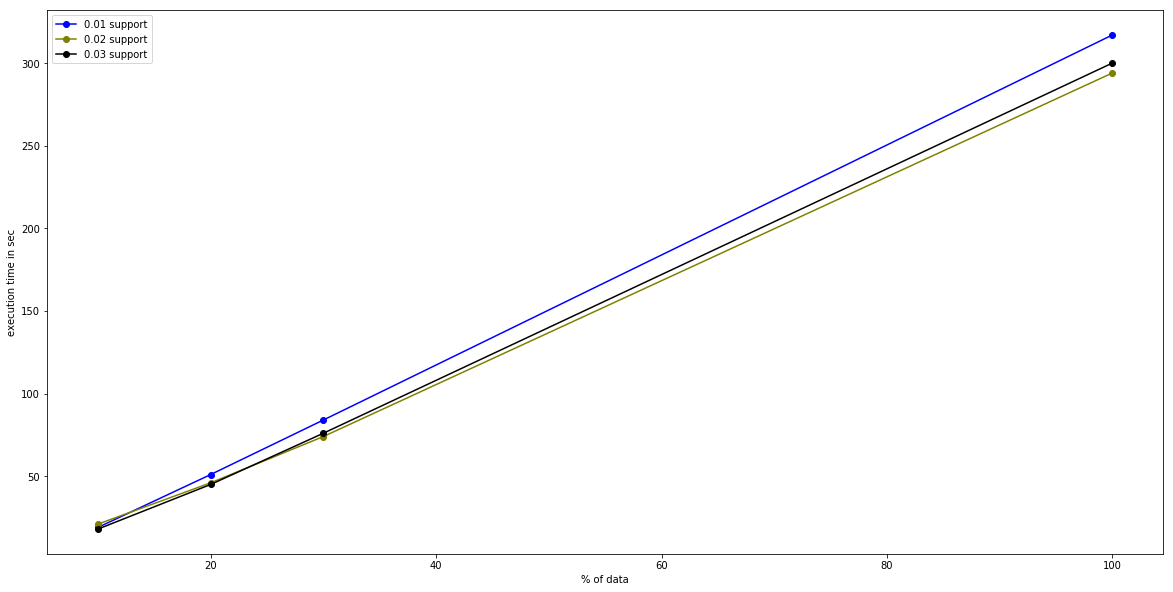

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.figure(figsize=(20,10))
plt.plot( x, a, marker='o', color='blue',label = '0.01 support')
plt.plot( x, b, marker='o', color='olive', label = '0.02 support')
plt.plot( x, c, marker='o', color='black', label='0.03 support')
plt.legend()
plt.xlabel('% of data')
plt.ylabel('execution time in sec')
plt.show()


# Flase positive and Flase negitive

In [110]:
falsepos = []
for n,s in enumerate(SLSet[0:3]): # for 0.01 % supp thershold
    it2 = ((list(itertools.chain(*([([list(x) for x in i]) for i in s])))))
    it1 = ((list(itertools.chain(*([([list(x) for x in i]) for i in FullLSet[0]])))))
    for every in it2:
        if(f31every not in it1):
            falsepos.append(every)
    print(n,len(falsepos))

0 14
1 22
2 31


In [111]:
falseneg = []
for n,s in enumerate(SLSet[0:3]): # for 0.01 % supp thershold
    it2 = ((list(itertools.chain(*([([list(x) for x in i]) for i in s])))))
    it1 = ((list(itertools.chain(*([([list(x) for x in i]) for i in FullLSet[0]])))))
    for every in it1:
        if(every not in it2):
            falseneg.append(every)
    print(n,len(falseneg))

0 9
1 18
2 23


In [113]:
falsepos = []
for n,s in enumerate(SLSet[3:6]): # for 0.01 % supp thershold
    it2 = ((list(itertools.chain(*([([list(x) for x in i]) for i in s])))))
    it1 = ((list(itertools.chain(*([([list(x) for x in i]) for i in FullLSet[1]])))))
    for every in it2:
        if(every not in it1):
            falsepos.append(every)
    print(n,len(falsepos))

0 2
1 6
2 10


In [114]:
falseneg = []
for n,s in enumerate(SLSet[3:6]): # for 0.01 % supp thershold
    it2 = ((list(itertools.chain(*([([list(x) for x in i]) for i in s])))))
    it1 = ((list(itertools.chain(*([([list(x) for x in i]) for i in FullLSet[1]])))))
    for every in it1:
        if(every not in it2):
            falseneg.append(every)
    print(n,len(falseneg))

0 3
1 8
2 12


In [115]:
falsepos = []
for n,s in enumerate(SLSet[6:9]): # for 0.01 % supp thershold
    it2 = ((list(itertools.chain(*([([list(x) for x in i]) for i in s])))))
    it1 = ((list(itertools.chain(*([([list(x) for x in i]) for i in FullLSet[2]])))))
    for every in it2:
        if(every not in it1):
            falsepos.append(every)
    print(n,len(falsepos))

0 0
1 0
2 0


In [116]:
falseneg = []
for n,s in enumerate(SLSet[6:9]): # for 0.01 % supp thershold
    it2 = ((list(itertools.chain(*([([list(x) for x in i]) for i in s])))))
    it1 = ((list(itertools.chain(*([([list(x) for x in i]) for i in FullLSet[2]])))))
    for every in it1:
        if(every not in it2):
            falseneg.append(every)
    print(n,len(falseneg))

0 1
1 2
2 2
